In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../datasets/clean_main_df.csv')

In [3]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_of_ride_sec,duration_of_ride_min,ride_start_in_years,ride_start_in_month,ride_start_in_quarter,ride_start_in_weekday,ride_start_in_weekofmonth
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,177.0,2.57,2022,January,1,Thursday,3
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,261.0,4.21,2022,January,1,Monday,3
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,261.0,4.21,2022,January,1,Tuesday,5
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,896.0,14.56,2022,January,1,Tuesday,2
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,362.0,6.20,2022,January,1,Thursday,4


In [5]:
df.duration_of_ride_sec.describe().apply(lambda x: format(x, '.2f'))

count    4560464.00
mean        1136.88
std         1339.75
min           61.00
25%          422.00
50%          733.00
75%         1322.00
max        16496.00
Name: duration_of_ride_sec, dtype: object

In [6]:
df[df.duration_of_ride_sec<60 ]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_of_ride_sec,duration_of_ride_min,ride_start_in_years,ride_start_in_month,ride_start_in_quarter,ride_start_in_weekday,ride_start_in_weekofmonth


In [7]:
df.loc[(df.duration_of_ride_sec<120) & (df.start_station_name==df.end_station_name)]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_of_ride_sec,duration_of_ride_min,ride_start_in_years,ride_start_in_month,ride_start_in_quarter,ride_start_in_weekday,ride_start_in_weekofmonth
48,060598F8DA7E017B,classic_bike,2022-01-26 15:53:41,2022-01-26 15:55:12,Evanston Civic Center,661,Evanston Civic Center,661,42.057044,-87.686554,42.057044,-87.686554,member,91.0,1.31,2022,January,1,Wednesday,5
127,6C6F829EADEFC679,electric_bike,2022-01-20 18:48:59,2022-01-20 18:50:26,N Southport Ave & W Newport Ave,20257.0,N Southport Ave & W Newport Ave,20257.0,41.940000,-87.660000,41.940000,-87.660000,casual,87.0,1.27,2022,January,1,Thursday,4
291,8DAC771AE9B73497,classic_bike,2022-01-30 15:43:02,2022-01-30 15:44:45,Wood St & 35th St,KA1503000066,Wood St & 35th St,KA1503000066,41.830105,-87.670298,41.830105,-87.670298,member,103.0,1.43,2022,January,1,Sunday,5
413,A36BACC0E614ABE6,classic_bike,2022-01-01 12:05:12,2022-01-01 12:06:20,Michigan Ave & Jackson Blvd,TA1309000002,Michigan Ave & Jackson Blvd,TA1309000002,41.877850,-87.624080,41.877850,-87.624080,casual,68.0,1.80,2022,January,1,Saturday,1
677,5904AEC0CF58C0FC,classic_bike,2022-01-04 14:42:51,2022-01-04 14:44:46,State St & Randolph St,TA1305000029,State St & Randolph St,TA1305000029,41.884621,-87.627834,41.884621,-87.627834,casual,115.0,1.55,2022,January,1,Tuesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4560294,D9E672A9F00C9CDE,classic_bike,2021-12-26 15:52:22,2021-12-26 15:54:13,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,41.900960,-87.623777,casual,111.0,1.51,2021,December,4,Sunday,4
4560320,C9099EB962AC04EE,classic_bike,2021-12-12 16:23:09,2021-12-12 16:24:16,Clark St & Grace St,TA1307000127,Clark St & Grace St,TA1307000127,41.950780,-87.659172,41.950780,-87.659172,member,67.0,1.70,2021,December,4,Sunday,2
4560334,1F1F0101A435157E,electric_bike,2021-12-11 09:57:02,2021-12-11 09:58:35,Kingsbury St & Kinzie St,KA1503000043,Kingsbury St & Kinzie St,KA1503000043,41.889128,-87.638415,41.889177,-87.638506,member,93.0,1.33,2021,December,4,Saturday,2
4560354,960D4CE800616A58,classic_bike,2021-12-12 09:19:03,2021-12-12 09:20:15,Kingsbury St & Kinzie St,KA1503000043,Kingsbury St & Kinzie St,KA1503000043,41.889177,-87.638506,41.889177,-87.638506,casual,72.0,1.12,2021,December,4,Sunday,2


In [8]:
top_10_starting_station=df.start_station_name.value_counts().sort_values(ascending=False).head(10)
print(top_10_starting_station)

Streeter Dr & Grand Ave     79157
Michigan Ave & Oak St       42113
Wells St & Concord Ln       41444
Millennium Park             39902
Clark St & Elm St           39075
Wells St & Elm St           35775
Theater on the Lake         35207
Kingsbury St & Kinzie St    32704
Clark St & Lincoln Ave      31529
Wabash Ave & Grand Ave      31138
Name: start_station_name, dtype: int64


In [9]:
len(df.start_station_name.unique())

844

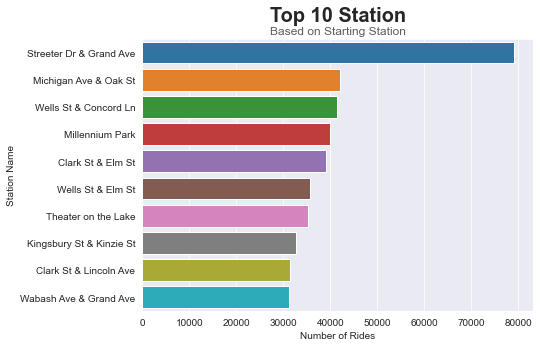

In [10]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(y = top_10_starting_station.index, x = top_10_starting_station, orient='h')
ax.text(x=0.5, y=1.05, s='Top 10 Station', fontsize=20, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.01, s='Based on Starting Station', fontsize=12, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
plt.xlabel('Number of Rides')
plt.ylabel('Station Name')
plt.show()

In [11]:
top_10_end_station=df.end_station_name.value_counts().sort_values(ascending=False).head(10)
print(top_10_end_station)

Streeter Dr & Grand Ave     80710
Michigan Ave & Oak St       42906
Wells St & Concord Ln       41785
Millennium Park             41279
Clark St & Elm St           38488
Theater on the Lake         35658
Wells St & Elm St           35639
Kingsbury St & Kinzie St    32191
Wabash Ave & Grand Ave      31719
Clark St & Lincoln Ave      31491
Name: end_station_name, dtype: int64


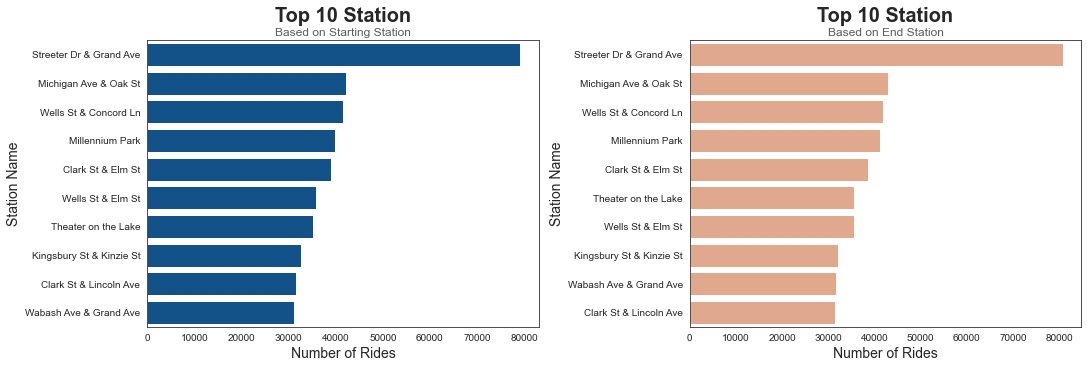

In [41]:
sns.set_style('white')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5),constrained_layout = True)
sns.barplot(y = top_10_starting_station.index, x = top_10_starting_station, orient='h',ax=ax[0],color=plat[0])
ax[0].text(x=0.5, y=1.05, s='Top 10 Station', fontsize=20, weight='bold', ha='center', va='bottom', transform=ax[0].transAxes)
ax[0].text(x=0.5, y=1.01, s='Based on Starting Station', fontsize=12, alpha=0.75, ha='center', va='bottom', transform=ax[0].transAxes)
ax[0].set_xlabel('Number of Rides',fontsize=14)
ax[0].set_ylabel('Station Name',fontsize=14)

sns.barplot(y = top_10_end_station.index, x = top_10_end_station, orient='h',ax=ax[1],color=plat[1])
ax[1].text(x=0.5, y=1.05, s='Top 10 Station', fontsize=20, weight='bold', ha='center', va='bottom', transform=ax[1].transAxes)
ax[1].text(x=0.5, y=1.01, s='Based on End Station', fontsize=12, alpha=0.75, ha='center', va='bottom', transform=ax[1].transAxes)
ax[1].set_xlabel('Number of Rides', fontsize=14)
ax[1].set_ylabel('Station Name',fontsize=14)
plt.show()

In [13]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data=df.ride_start_in_month.value_counts()[new_order]
data

January       78973
February      87530
March        202970
April        293903
May          443780
June         598626
July         681493
August       664730
September    612153
October      470604
November     251899
December     173803
Name: ride_start_in_month, dtype: int64

In [14]:
# sns.countplot(df.ride_start_in_month,hue=df.rideable_type,kind='line')

In [15]:
month_type_count=df.groupby([df.rideable_type,df.ride_start_in_month]).size().to_frame().reset_index()
month_type_count['ride_start_in_month'] = pd.Categorical(month_type_count['ride_start_in_month'],categories=new_order,ordered=True)
month_type_count = month_type_count.sort_values('ride_start_in_month',ascending=True)



<AxesSubplot:xlabel='ride_start_in_month', ylabel='0'>

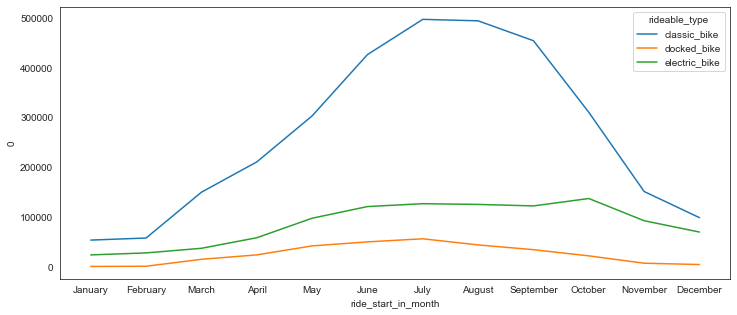

In [16]:
plt.figure(figsize=(12,5))
sns.lineplot(x=month_type_count.ride_start_in_month,y=month_type_count[0],hue=month_type_count.rideable_type)

['classic_bike', 'docked_bike', 'electric_bike']
<class 'matplotlib.legend.Legend'>


<Figure size 864x360 with 0 Axes>

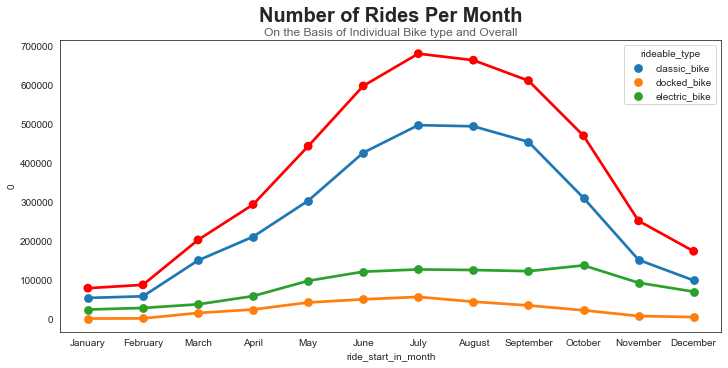

In [17]:
plt.figure(figsize=(12,5))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,5),constrained_layout = True)
sns.pointplot(x=data.index,y=data,color='red',label='Overall')
sns.pointplot(x=month_type_count.ride_start_in_month,y=month_type_count[0],hue=month_type_count.rideable_type)
ax.text(x=0.5, y=1.05, s='Number of Rides Per Month', fontsize=20, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.01, s='On the Basis of Individual Bike type and Overall', fontsize=12, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
handles, labels = ax.get_legend_handles_labels()
print(labels)
x = ax.get_legend()
print(type(x))

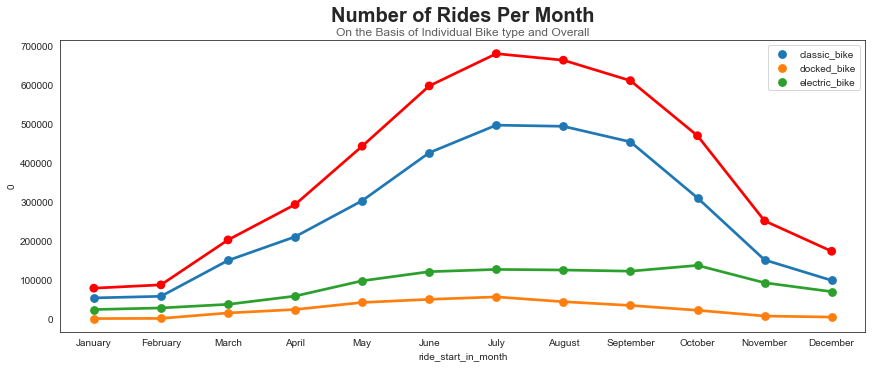

In [18]:

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,5),constrained_layout = True)
sns.pointplot(x=data.index,y=data,color='red',label='Overall',marker='o',linewidth = 3,markersize=10)
sns.pointplot(x=month_type_count.ride_start_in_month,y=month_type_count[0],hue=month_type_count.rideable_type,marker='o',linewidth = 3,markersize=10,alpha=0.5)
ax.text(x=0.5, y=1.05, s='Number of Rides Per Month', fontsize=20, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.01, s='On the Basis of Individual Bike type and Overall', fontsize=12, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
L=plt.legend()


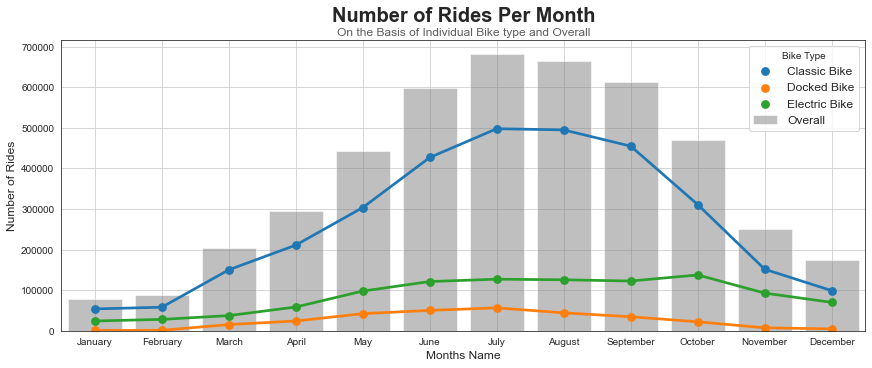

In [19]:

fig, ax = plt.subplots(figsize=(12,5),constrained_layout = True)


sns.barplot(x=data.index,y=data,color='grey',label='Overall',alpha=0.5)
sns.pointplot(x=month_type_count.ride_start_in_month,y=month_type_count[0],hue=month_type_count.rideable_type,marker='o',linewidth = 3,markersize=10,alpha=0.5)
ax.text(x=0.5, y=1.05, s='Number of Rides Per Month', fontsize=20, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.01, s='On the Basis of Individual Bike type and Overall', fontsize=12, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

L=plt.legend(fontsize='large', title="Bike Type")
L.get_texts()[0].set_text('Classic Bike')
L.get_texts()[1].set_text('Docked Bike')
L.get_texts()[2].set_text('Electric Bike')
plt.xlabel("Months Name",fontsize=12)
plt.ylabel("Number of Rides",fontsize=12)
plt.grid()
plt.savefig('Number of Rides Per Month.png')

# Average ride per month based on Customer type

In [20]:
average=df.groupby([df.member_casual,df.ride_start_in_month],as_index=False).agg('mean')

In [21]:
average['ride_start_in_month'] = pd.Categorical(average['ride_start_in_month'],categories=new_order,ordered=True)
average = average.sort_values('ride_start_in_month',ascending=True)

In [22]:
average_1=df.groupby([df.ride_start_in_month],as_index=False).agg('mean')

In [23]:
average_1['ride_start_in_month'] = pd.Categorical(average_1['ride_start_in_month'],categories=new_order,ordered=True)
average_1 = average_1.sort_values('ride_start_in_month',ascending=True)

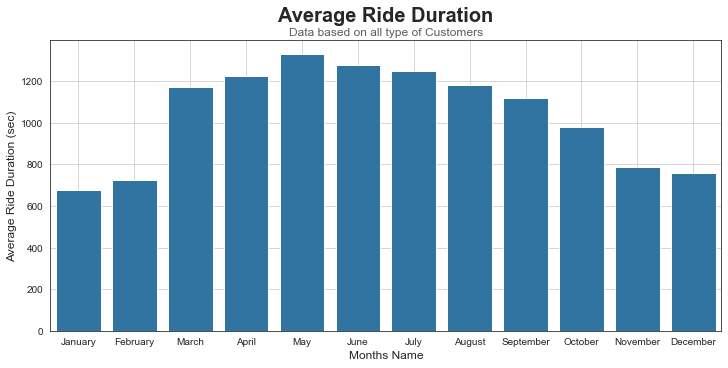

In [24]:

fig, ax = plt.subplots(figsize=(10,5),constrained_layout = True)
ax.text(x=0.5, y=1.05, s='Average Ride Duration', fontsize=20, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.01, s='Data based on all type of Customers', fontsize=12, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
sns.barplot(x=average_1.ride_start_in_month,y=average_1.duration_of_ride_sec,label='Overall',color='C10')
plt.xlabel("Months Name",fontsize=12)
plt.ylabel("Average Ride Duration (sec)",fontsize=12)
plt.grid()
plt.savefig('Average Ride Duration Per Month.png')

['#EEA47FFF', '#00539CFF']


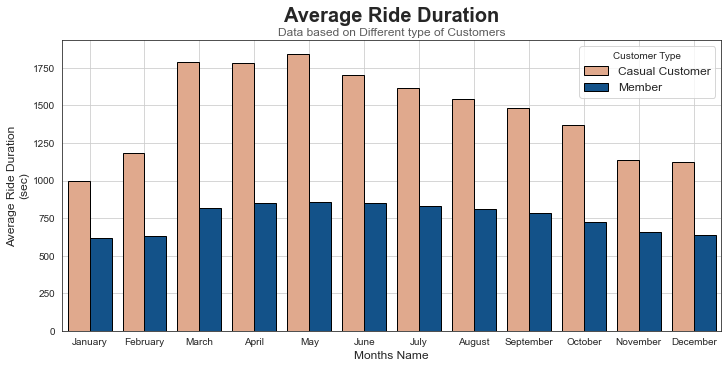

In [39]:


plat=['#00539CFF', '#EEA47FFF']
print(plat[::-1])
fig, ax = plt.subplots(figsize=(10,5),constrained_layout = True)

ax.text(x=0.5, y=1.05, s='Average Ride Duration', fontsize=20, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.01, s='Data based on Different type of Customers', fontsize=12, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
sns.barplot(x=average.ride_start_in_month,y=average.duration_of_ride_sec,hue=average.member_casual,linewidth=1, edgecolor = 'black',palette=plat[::-1])
plt.xlabel("Months Name",fontsize=12)
plt.ylabel("Average Ride Duration\n(sec)",fontsize=12)
L=plt.legend(fontsize='large', title="Customer Type")
L.get_texts()[0].set_text('Casual Customer')
L.get_texts()[1].set_text('Member')

plt.grid()
plt.savefig('Average Ride Duration Per Month Based on Customers.png')

NameError: name 'ga' is not defined